In [2507]:
import numpy as np 
import pandas as pd 

In [2508]:
df = pd.read_excel("C:/Users/ACER/Downloads/Data Hakaton.xlsx")

In [2509]:
df.dropna(axis=1)

,Date,seher temprator,axsam temp,Seher,Gunesli saat sayi,solar intensity,solar panel per hour
0,2022-07-01,40,18,Füzuli,7,1337,292
1,2022-07-02,39,24,Xocavənd,9,1492,324
2,2022-07-03,34,16,Kəlbəcər,10,1430,322
3,2022-07-04,33,18,Laçın,7,1535,369
4,2022-07-05,31,30,Ağdam,9,1346,341
...,...,...,...,...,...,...,...
734,2022-06-26,19,16,Qubadlı,8,1350,291
735,2022-06-27,22,30,Füzuli,10,1573,294
736,2022-06-28,23,9,Xocalı,9,1179,312
737,2022-06-29,19,30,Qubadlı,7,1204,371


In [2510]:
df = df[["Date","seher temprator",'axsam temp','Seher','Gunesli saat sayi','solar intensity']]

In [2511]:
df['Istifade edilen enerji her aile ucun (kwh) per day'] = np.random.randint(5,12, df.shape[0])

In [2512]:
df

,Date,seher temprator,axsam temp,Seher,Gunesli saat sayi,solar intensity,Istifade edilen enerji her aile ucun (kwh) per day
0,2022-07-01,40,18,Füzuli,7,1337,7
1,2022-07-02,39,24,Xocavənd,9,1492,11
2,2022-07-03,34,16,Kəlbəcər,10,1430,6
3,2022-07-04,33,18,Laçın,7,1535,7
4,2022-07-05,31,30,Ağdam,9,1346,7
...,...,...,...,...,...,...,...
734,2022-06-26,19,16,Qubadlı,8,1350,6
735,2022-06-27,22,30,Füzuli,10,1573,10
736,2022-06-28,23,9,Xocalı,9,1179,7
737,2022-06-29,19,30,Qubadlı,7,1204,9


In [2513]:
df["Solar panel output"] = np.random.randint(100,200, df.shape[0])

In [2514]:
df[df['Istifade edilen enerji her aile ucun (kwh) per day']>df['Solar panel output']]['Date']

Series([], Name: Date, dtype: datetime64[ns])

In [2515]:
df["solar intensity"] = np.random.randint(30.3,44.1, df.shape[0])

In [2516]:
df

,Date,seher temprator,axsam temp,Seher,Gunesli saat sayi,solar intensity,Istifade edilen enerji her aile ucun (kwh) per day,Solar panel output
0,2022-07-01,40,18,Füzuli,7,32,7,149
1,2022-07-02,39,24,Xocavənd,9,36,11,174
2,2022-07-03,34,16,Kəlbəcər,10,38,6,144
3,2022-07-04,33,18,Laçın,7,36,7,171
4,2022-07-05,31,30,Ağdam,9,35,7,181
...,...,...,...,...,...,...,...,...
734,2022-06-26,19,16,Qubadlı,8,43,6,175
735,2022-06-27,22,30,Füzuli,10,34,10,125
736,2022-06-28,23,9,Xocalı,9,33,7,100
737,2022-06-29,19,30,Qubadlı,7,35,9,174


In [2457]:
df.to_excel("Time_Series_Data2.xlsx",index=None)

## Predict the amount of energy 

In [2458]:
data = df[["Date","Solar panel output"]]

In [2459]:
data

,Date,Solar panel output
0,2022-07-01,119
1,2022-07-02,141
2,2022-07-03,122
3,2022-07-04,121
4,2022-07-05,171
...,...,...
734,2022-06-26,113
735,2022-06-27,126
736,2022-06-28,189
737,2022-06-29,186


In [2460]:
data = data.copy()
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%dT')
data = data.set_index('Date')
data = data.sort_index()

In [2461]:
data

,Solar panel output
Date,
2020-09-01,125
2020-09-02,107
2020-09-03,193
2020-09-04,191
2020-09-05,196
...,...
2022-09-05,197
2022-09-06,168
2022-09-07,113


<AxesSubplot:title={'center':'Amount of solar energy'}, xlabel='Date'>

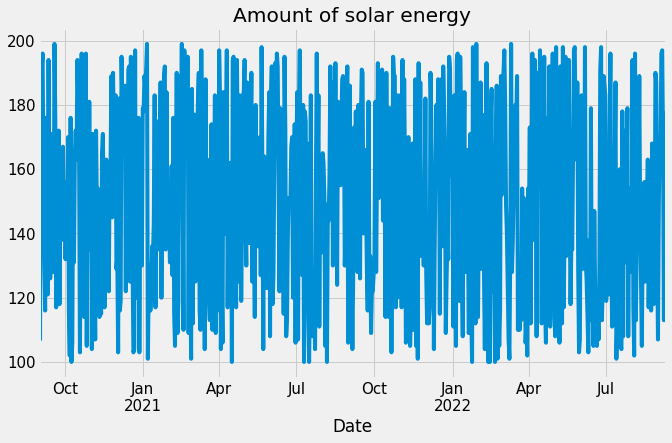

In [2506]:
import matplotlib.pyplot as plt 
temp=data.groupby(['Date'])['Solar panel output'].mean() 
temp.plot(figsize=(10,6), title= 'Amount of solar energy', fontsize=15)

In [2462]:
end_train = '2021-12-31'
end_validation = '2022-05-01'
data_train = data.loc[: end_train, :]
data_val   = data.loc[end_train:end_validation, :]
data_test  = data.loc[end_validation:, :]

In [2463]:
data_train

,Solar panel output
Date,
2020-09-01,125
2020-09-02,107
2020-09-03,193
2020-09-04,191
2020-09-05,196
...,...
2021-12-27,132
2021-12-28,195
2021-12-29,191


In [2464]:
data_val

,Solar panel output
Date,
2021-12-31,174
2022-01-01,177
2022-01-02,111
2022-01-03,183
2022-01-04,154
...,...
2022-04-27,162
2022-04-28,180
2022-04-29,196


In [2465]:
data_test

,Solar panel output
Date,
2022-05-01,114
2022-05-02,108
2022-05-03,198
2022-05-04,134
2022-05-05,136
...,...
2022-09-05,197
2022-09-06,168
2022-09-07,113


In [2466]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelling and Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

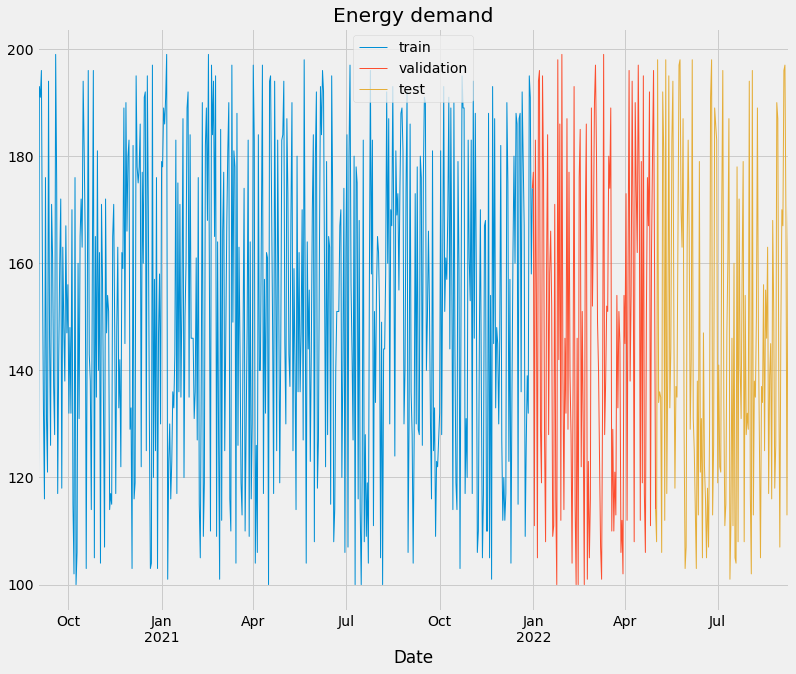

In [2467]:
fig, ax = plt.subplots(figsize=(12,10))
data_train["Solar panel output"].plot(ax=ax, label='train', linewidth=1)
data_val["Solar panel output"].plot(ax=ax, label='validation', linewidth=1)
data_test["Solar panel output"].plot(ax=ax, label='test', linewidth=1)
ax.set_title('Energy demand')
ax.legend();

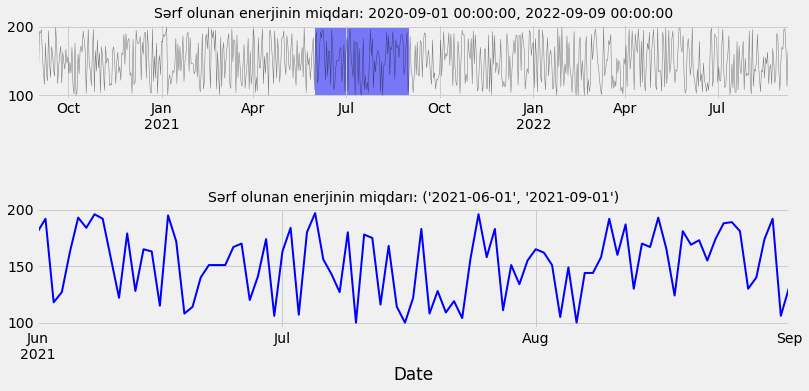

In [2468]:
zoom = ('2021-06-01','2021-09-01')

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])

data["Solar panel output"].plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(data["Solar panel output"])
max_y = max(data["Solar panel output"])
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')

data.loc[zoom[0]: zoom[1]]["Solar panel output"].plot(ax=zoom_ax, color='blue', linewidth=2)

main_ax.set_title(f'Sərf olunan enerjinin miqdarı: {data.index.min()}, {data.index.max()}', fontsize=14)
zoom_ax.set_title(f'Sərf olunan enerjinin miqdarı: {zoom}', fontsize=14)
plt.subplots_adjust(hspace=1)

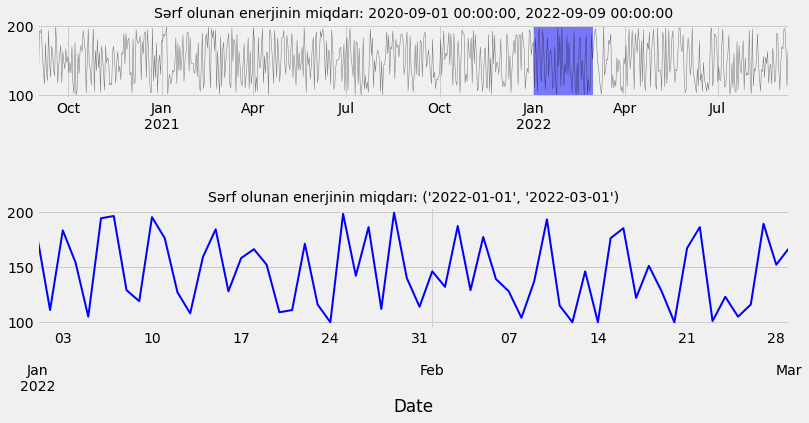

In [2479]:
zoom = ('2022-01-01','2022-03-01')

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])

data["Solar panel output"].plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(data["Solar panel output"])
max_y = max(data["Solar panel output"])
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')

data.loc[zoom[0]: zoom[1]]["Solar panel output"].plot(ax=zoom_ax, color='blue', linewidth=2)

main_ax.set_title(f'Sərf olunan enerjinin miqdarı: {data.index.min()}, {data.index.max()}', fontsize=14)
zoom_ax.set_title(f'Sərf olunan enerjinin miqdarı: {zoom}', fontsize=14)
plt.subplots_adjust(hspace=1)

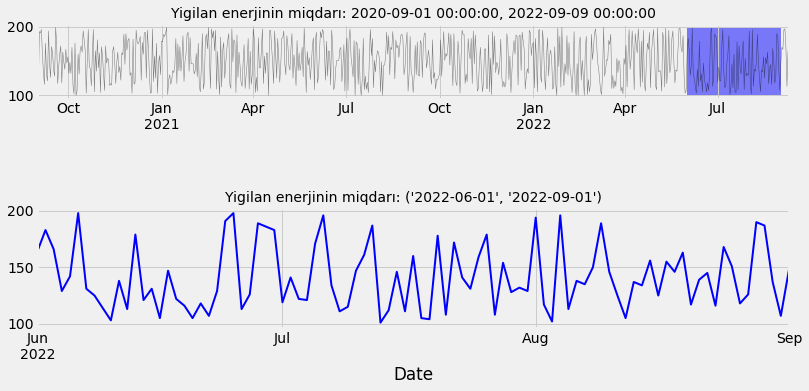

In [2478]:
zoom = ('2022-06-01','2022-09-01')

fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])

data["Solar panel output"].plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(data["Solar panel output"])
max_y = max(data["Solar panel output"])
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')

data.loc[zoom[0]: zoom[1]]["Solar panel output"].plot(ax=zoom_ax, color='blue', linewidth=2)

main_ax.set_title(f'Yigilan enerjinin miqdarı: {data.index.min()}, {data.index.max()}', fontsize=14)
zoom_ax.set_title(f'Yigilan enerjinin miqdarı: {zoom}', fontsize=14)
plt.subplots_adjust(hspace=1)

In [2429]:
forecaster = ForecasterAutoreg(regressor = make_pipeline(StandardScaler(), Ridge()),lags= 24)

forecaster.fit(y=data.loc[:end_validation, 'Solar panel output'])
forecaster

C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 607] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'ridge__alpha': 1.0, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__normalize': 'deprecated', 'ridge__positive': False, 'ridge__random_state': None, 'ridge__solver': 'auto', 'ridge__tol': 0.001} 
Creation date: 2022-09-10 23:47:38 
Last fit date: 2022-09-10 23:47:39 
Skforecast version: 0.4.3 

In [2430]:
metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y= data["Solar panel output"],
                            initial_train_size = len(data.loc[:end_validation]),
                            fixed_train_size   = False,
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = True
                       )

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 608
Number of observations used for backtesting: 131
    Number of folds: 6
    Number of steps per fold: 24
    Last fold only includes 11 observations

Data partition in fold: 0
    Training:   2020-09-01 00:00:00 -- 2022-05-01 00:00:00
    Validation: 2022-05-02 00:00:00 -- 2022-05-25 00:00:00
Data partition in fold: 1
    Training:   2020-09-01 00:00:00 -- 2022-05-01 00:00:00
    Validation: 2022-05-26 00:00:00 -- 2022-06-18 00:00:00
Data partition in fold: 2
    Training:   2020-09-01 00:00:00 -- 2022-05-01 00:00:00
    Validation: 2022-06-19 00:00:00 -- 2022-07-12 00:00:00
Data partition in fold: 3
    Training:   2020-09-01 00:00:00 -- 2022-05-01 00:00:00
    Validation: 2022-07-13 00:00:00 -- 2022-08-05 00:00:00
Data partition in fold: 4
    Training:   2020-09-01 00:00:00 -- 2022-05-01 00:00:00
    Validation: 2022-08-06 00:00:00 -- 2022-

C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of 

In [2431]:
data

,Solar panel output
Date,
2020-09-01,125
2020-09-02,145
2020-09-03,110
2020-09-04,123
2020-09-05,134
...,...
2022-09-05,198
2022-09-06,197
2022-09-07,131


In [2432]:
data.loc[:end_validation]

,Solar panel output
Date,
2020-09-01,125
2020-09-02,145
2020-09-03,110
2020-09-04,123
2020-09-05,134
...,...
2022-04-27,162
2022-04-28,146
2022-04-29,159


In [2433]:
data.loc[:end_validation].iloc[:608]

,Solar panel output
Date,
2020-09-01,125
2020-09-02,145
2020-09-03,110
2020-09-04,123
2020-09-05,134
...,...
2022-04-27,162
2022-04-28,146
2022-04-29,159


In [2435]:
print(f'Backtest error: {metric}') 

Backtest error: 24.987632714642068


In [2436]:
forecaster = ForecasterAutoreg(
                    regressor = make_pipeline(StandardScaler(), Ridge()),
                    lags      = 24 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [5, 24, [1, 2, 3, 23, 24, 25, 47, 48, 49]]

# Regressor's hyperparameters
param_grid = {'ridge__alpha': np.logspace(-3, 5, 10)}

results_grid = grid_search_forecaster(
                        forecaster  = forecaster,
                        y = data.loc[:end_validation, 'Solar panel output'],
                        param_grid = param_grid,
                        lags_grid = lags_grid,
                        steps = 24,
                        metric = 'mean_absolute_error',
                        refit = False,
                        initial_train_size = len(data[:end_train]),
                        fixed_train_size   = False,
                        return_best = True,
                        verbose     = False
                 )

Number of models compared: 30


loop param_grid:   0%|                                             | 0/10 [00:00<?, ?it/s]C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_wi

C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(

loop param_grid:  60%|██████████████████████▏              | 6/10 [00:00<00:00, 11.70it/s]C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_w

C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(

loop param_grid:  10%|███▋                                 | 1/10 [00:00<00:01,  8.93it/s]C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarnin

C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(

loop param_grid:  60%|██████████████████████▏              | 6/10 [00:00<00:00, 10.92it/s]C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_w

C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a Rang

loop param_grid:  60%|██████████████████████▏              | 6/10 [00:00<00:00,  9.60it/s]C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_wi

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
  Parameters: {'ridge__alpha': 215.44346900318823}
  Backtesting metric: 22.916922008922345



C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [2437]:
results_grid

,lags,params,metric,ridge__alpha
16,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'ridge__alpha': 215.44346900318823},22.916922,215.443469
17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{'ridge__alpha': 1668.1005372000557},22.928534,1668.100537
0,"[1, 2, 3, 4, 5]",{'ridge__alpha': 0.001},22.947913,0.001000
1,"[1, 2, 3, 4, 5]",{'ridge__alpha': 0.007742636826811269},22.947914,0.007743
2,"[1, 2, 3, 4, 5]",{'ridge__alpha': 0.05994842503189409},22.947918,0.059948
3,"[1, 2, 3, 4, 5]",{'ridge__alpha': 0.46415888336127775},22.947949,0.464159
4,"[1, 2, 3, 4, 5]",{'ridge__alpha': 3.593813663804626},22.948192,3.593814
5,"[1, 2, 3, 4, 5]",{'ridge__alpha': 27.825594022071257},22.949964,27.825594
6,"[1, 2, 3, 4, 5]",{'ridge__alpha': 215.44346900318823},22.959247,215.443469
27,"[1, 2, 3, 23, 24, 25, 47, 48, 49]",{'ridge__alpha': 1668.1005372000557},22.963099,1668.100537


In [2438]:
forecaster

ForecasterAutoreg 
Regressor: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=215.44346900318823))]) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 607] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'ridge__alpha': 215.44346900318823, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__normalize': 'deprecated', 'ridge__positive': False, 'ridge__random_state': None, 'ridge__solver': 'auto', 'ridge__tol': 0.001} 
Creation date: 2022-09-10 23:47:42 
Last fit date: 2022-09-10 23:47:45 
Skforecast version: 0.4.3 

In [2439]:
metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y = data["Solar panel output"],
                            initial_train_size = len(data[:end_validation]),
                            fixed_train_size   = False,
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = False
                      )

C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of 

In [2440]:
print(f'Backtest error: {metric}')

Backtest error: 24.9655335094212


In [2441]:
predictions

,pred
24,152.556682
25,149.110376
26,144.987260
27,145.845679
28,149.207018
...,...
30,143.035068
31,148.951094
32,148.749229
33,148.160738


In [2442]:
pred.to_excel("final_data1.xlsx")

In [2517]:
sum(predictions["pred"])/len(predictions["pred"])

148.17188615644608

In [2518]:
data['year'] = data.index.year

In [2519]:
a = data.groupby(['year']).sum()

In [2520]:
a

,Solar panel output
year,
2020,18313
2021,55374
2022,36917


In [2522]:
a.iloc[0]

Solar panel output    18313
Name: 2020, dtype: int32

In [2523]:
a.iloc[1]

Solar panel output    55374
Name: 2021, dtype: int32

In [2524]:
a.iloc[2]

Solar panel output    36917
Name: 2022, dtype: int32

In [2525]:
average_energy_amount_yearly = (a.iloc[0] + a.iloc[1]+a.iloc[2])/3 

In [2526]:
average_energy_amount_yearly

Solar panel output    36868.0
dtype: float64

In [2037]:
## result: Average amount of solar energy for per year => 36931 Kwh

In [2038]:
# for families 

In [2380]:
df

,Date,seher temprator,axsam temp,Seher,Gunesli saat sayi,solar intensity,Solar panel output(kwh) per year,Istifade edilen enerji her aile ucun (kwh) per day,Solar panel output
0,2022-07-01,36,9,Cəbrayıl,9,39,1788.75,5,122
1,2022-07-02,35,28,Xocalı,10,37,2355.00,11,196
2,2022-07-03,40,16,Qubadlı,8,33,1794.00,7,139
3,2022-07-04,33,25,Laçın,8,34,1572.00,6,119
4,2022-07-05,34,19,Xocalı,8,41,1902.00,11,161
...,...,...,...,...,...,...,...,...,...
734,2022-06-26,24,25,Şuşa,9,41,2463.75,9,165
735,2022-06-27,25,13,Laçın,10,37,2602.50,9,115
736,2022-06-28,23,24,Füzuli,8,36,2148.00,6,199
737,2022-06-29,26,10,Laçın,10,37,2377.50,10,112


In [2381]:
data1=df[["Date","Istifade edilen enerji her aile ucun (kwh) per day"]]

In [2382]:
data1 = data1.set_index('Date')
data1 = data1.sort_index()

In [2383]:
data1

,Istifade edilen enerji her aile ucun (kwh) per day
Date,
2020-09-01,5
2020-09-02,11
2020-09-03,10
2020-09-04,8
2020-09-05,5
...,...
2022-09-05,11
2022-09-06,9
2022-09-07,6


In [2384]:
data1['year'] = data1.index.year

In [2385]:
a = data1.groupby(['year']).sum()

In [2386]:
a.iloc[0]

Istifade edilen enerji her aile ucun (kwh) per day    978
Name: 2020, dtype: int32

In [2387]:
a.iloc[1]

Istifade edilen enerji her aile ucun (kwh) per day    2938
Name: 2021, dtype: int32

In [2388]:
a.iloc[2]

Istifade edilen enerji her aile ucun (kwh) per day    2020
Name: 2022, dtype: int32

In [2389]:
summation = a.iloc[0]+ a.iloc[1] + a.iloc[2]

In [2390]:
summation/3 

Istifade edilen enerji her aile ucun (kwh) per day    1978.666667
dtype: float64

## Average consumption of energy by each family yearly

In [2391]:
end_train = '2021-12-31'
end_validation = '2022-05-01'
data_train = data1.loc[: end_train, :]
data_val   = data1.loc[end_train:end_validation, :]
data_test  = data1.loc[end_validation:, :]

In [2392]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelling and Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

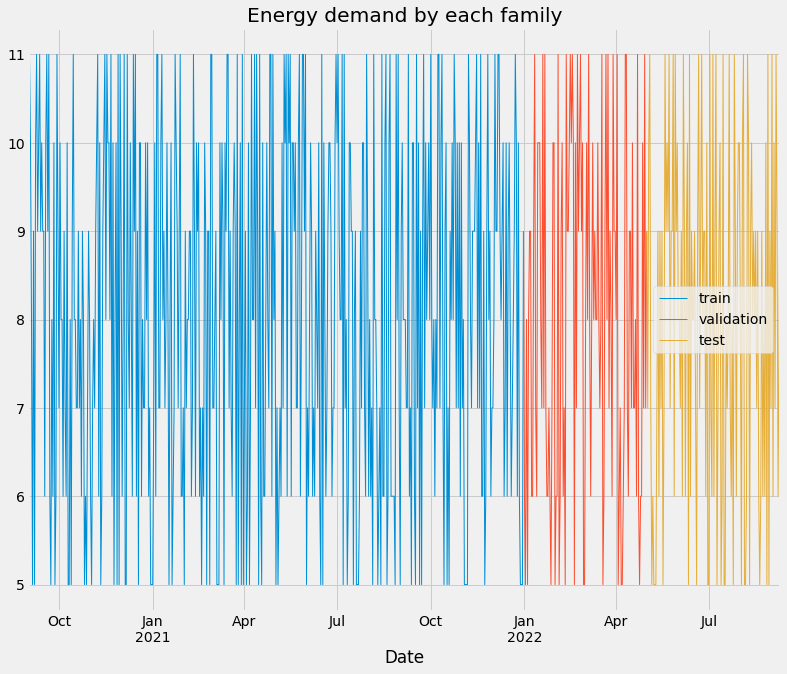

In [2393]:
fig, ax = plt.subplots(figsize=(12,10))
data_train["Istifade edilen enerji her aile ucun (kwh) per day"].plot(ax=ax, label='train', linewidth=1)
data_val["Istifade edilen enerji her aile ucun (kwh) per day"].plot(ax=ax, label='validation', linewidth=1)
data_test["Istifade edilen enerji her aile ucun (kwh) per day"].plot(ax=ax, label='test', linewidth=1)
ax.set_title('Energy demand by each family')
ax.legend();

In [2394]:
forecaster = ForecasterAutoreg(regressor = make_pipeline(StandardScaler(), Ridge()),lags= 24)

forecaster.fit(y=data1.loc[:end_validation, 'Istifade edilen enerji her aile ucun (kwh) per day'])
forecaster

C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 607] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'ridge__alpha': 1.0, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__normalize': 'deprecated', 'ridge__positive': False, 'ridge__random_state': None, 'ridge__solver': 'auto', 'ridge__tol': 0.001} 
Creation date: 2022-09-10 21:37:33 
Last fit date: 2022-09-10 21:37:33 
Skforecast version: 0.4.3 

In [2395]:
metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y= data1["Istifade edilen enerji her aile ucun (kwh) per day"],
                            initial_train_size = len(data1.loc[:end_validation]),
                            fixed_train_size   = False,
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = True
                       )

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 608
Number of observations used for backtesting: 131
    Number of folds: 6
    Number of steps per fold: 24
    Last fold only includes 11 observations

Data partition in fold: 0
    Training:   2020-09-01 00:00:00 -- 2022-05-01 00:00:00
    Validation: 2022-05-02 00:00:00 -- 2022-05-25 00:00:00
Data partition in fold: 1
    Training:   2020-09-01 00:00:00 -- 2022-05-01 00:00:00
    Validation: 2022-05-26 00:00:00 -- 2022-06-18 00:00:00
Data partition in fold: 2
    Training:   2020-09-01 00:00:00 -- 2022-05-01 00:00:00
    Validation: 2022-06-19 00:00:00 -- 2022-07-12 00:00:00
Data partition in fold: 3
    Training:   2020-09-01 00:00:00 -- 2022-05-01 00:00:00
    Validation: 2022-07-13 00:00:00 -- 2022-08-05 00:00:00
Data partition in fold: 4
    Training:   2020-09-01 00:00:00 -- 2022-05-01 00:00:00
    Validation: 2022-08-06 00:00:00 -- 2022-

C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\skforecast\utils\utils.py:301: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of 

In [2396]:
predictions 

,pred
24,8.296878
25,8.093215
26,8.153658
27,7.962958
28,8.320169
...,...
30,7.979221
31,8.222537
32,7.566348
33,8.036014


In [2397]:
data1.loc[:end_validation]

,Istifade edilen enerji her aile ucun (kwh) per day,year
Date,,
2020-09-01,5,2020
2020-09-02,11,2020
2020-09-03,10,2020
2020-09-04,8,2020
2020-09-05,5,2020
...,...,...
2022-04-27,10,2022
2022-04-28,7,2022
2022-04-29,11,2022


In [2398]:
data1["Istifade edilen enerji her aile ucun (kwh) per day"]

Date
2020-09-01     5
2020-09-02    11
2020-09-03    10
2020-09-04     8
2020-09-05     5
              ..
2022-09-05    11
2022-09-06     9
2022-09-07     6
2022-09-08     8
2022-09-09    10
Name: Istifade edilen enerji her aile ucun (kwh) per day, Length: 739, dtype: int32

In [2399]:
predictions

,pred
24,8.296878
25,8.093215
26,8.153658
27,7.962958
28,8.320169
...,...
30,7.979221
31,8.222537
32,7.566348
33,8.036014


In [2400]:
print(f'Backtest error: {metric}')

Backtest error: 1.7627243408143116


In [2401]:
predictions

,pred
24,8.296878
25,8.093215
26,8.153658
27,7.962958
28,8.320169
...,...
30,7.979221
31,8.222537
32,7.566348
33,8.036014


In [2402]:
pred.reset_index(drop=True, inplace=True)

In [2403]:
predictions.reset_index(drop=True, inplace=True)

In [2404]:
new_data = pd.concat([pred,predictions],axis=1)

In [2405]:
new_data.to_excel("final_result3.xlsx")